ValueError: operands could not be broadcast together with shapes (36,) (35,) 

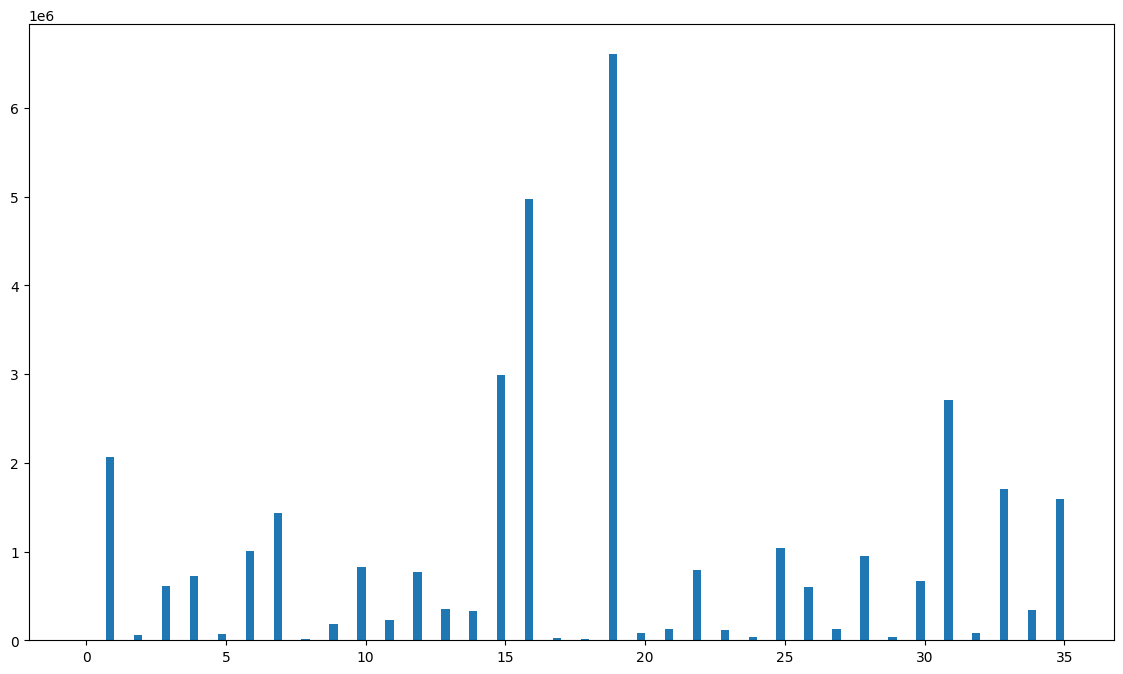

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the provided table
state_names = [
    'Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
    'Bihar', 'Chandigarh', 'Chhattisgarh', 'Delhi', 'Dadra and Nagar Haveli',
    'Goa', 'Gujarat', 'Himachal Pradesh', 'Haryana', 'Jharkhand',
    'Jammu and Kashmir', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep',
    'Maharashtra', 'Meghalaya', 'Manipur', 'Madhya Pradesh', 'Mizoram',
    'Nagaland', 'Odisha', 'Punjab', 'Pondicherry', 'Rajasthan', 'Sikkim',
    'Telangana', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
    'West Bengal'
]

total_confirmed = [
    7651, 2066450, 55155, 610645, 726098, 65351, 1006052, 1439870, 10681,
    178108, 826577, 224106, 771252, 348764, 332249, 2988333, 4968657, 20962,
    10365, 6611078, 83627, 123731, 792854, 121359, 31842, 1041457, 602401,
    128013, 954429, 31979, 671463, 2702623, 84468, 1710158, 343896, 1592908
]

total_recovered_ratio = [
    98, 99, 99, 98, 99, 99, 99, 98, 100, 98, 99, 97, 99, 98, 98, 98, 98, 99,
    99, 98, 98, 98, 99, 94, 94, 99, 97, 98, 99, 97, 98, 99, 99, 96, 98
]

total_deceased_ratio = [
    1.69, 0.70, 0.51, 0.98, 1.33, 1.25, 1.35, 1.74, 0.04, 1.89, 1.22, 1.67,
    1.30, 1.47, 1.33, 1.27, 0.64, 0.99, 0.49, 2.12, 1.73, 1.55, 1.33, 0.36,
    2.15, 0.81, 2.75, 1.45, 0.94, 1.24, 0.59, 1.34, 0.96, 1.34, 2.15, 1.20
]

# Convert lists to numpy arrays for plotting
x = np.arange(len(state_names))
width = 0.3

fig, ax = plt.subplots(figsize=(14, 8))

# Plot Total Confirmed cases
bars_confirmed = ax.bar(x - width/2, total_confirmed, width, label='Total Confirmed')

# Plot Total Recovered Ratio as stacked bars
bars_recovered = ax.bar(x + width/2, np.array(total_confirmed) * np.array(total_recovered_ratio) / 100, width, label='Total Recovered Ratio', color='green')

# Plot Total Deceased Ratio as stacked bars
bars_deceased = ax.bar(x + width/2, np.array(total_confirmed) * np.array(total_deceased_ratio) / 100, width, bottom=bars_recovered[0].get_height(), label='Total Deceased Ratio', color='red')

ax.set_xlabel('State Name')
ax.set_ylabel('Cases')
ax.set_title('COVID-19 Cases Distribution by State')
ax.set_xticks(x)
ax.set_xticklabels(state_names, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()

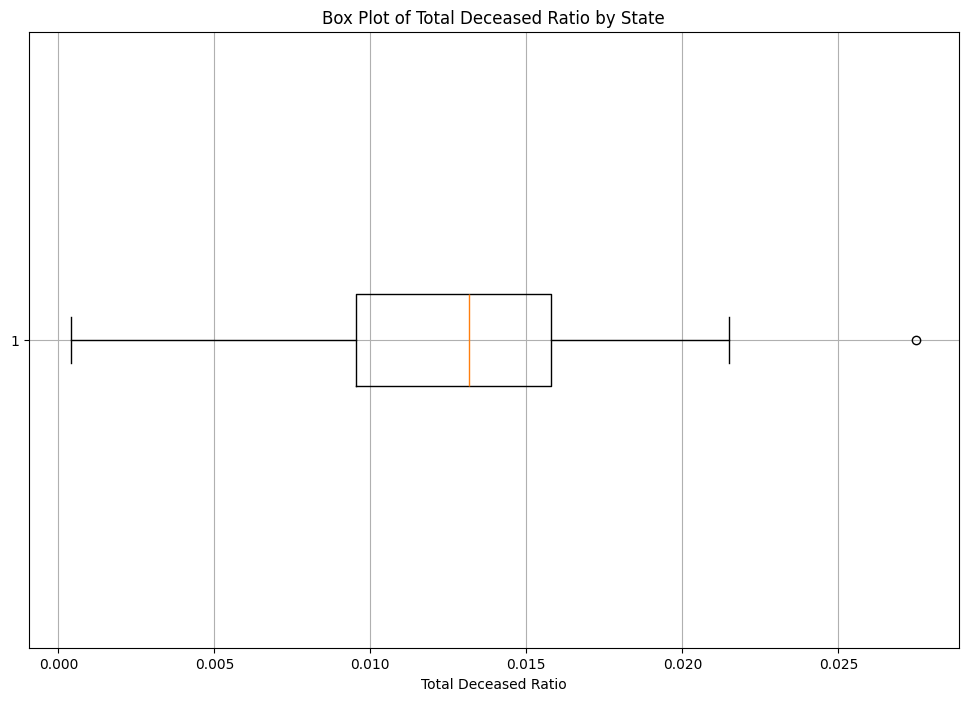

States with particularly high deceased ratios: ['Andaman and Nicobar Islands', 'Delhi', 'Goa', 'Himachal Pradesh', 'Maharashtra', 'Meghalaya', 'Nagaland', 'Punjab', 'Uttarakhand']
States with particularly low deceased ratios: ['Andhra Pradesh', 'Arunachal Pradesh', 'Dadra and Nagar Haveli', 'Kerala', 'Lakshadweep', 'Mizoram', 'Orissa', 'Rajasthan', 'Telangana']


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the dataframe from the structured data
data = {
    "state_name": ["Andaman and Nicobar Islands", "Andhra Pradesh", "Arunachal Pradesh", "Assam", "Bihar", "Chandigarh", 
                   "chattisgarh", "Delhi", "Dadra and Nagar Haveli", "Goa", "Gujarat", "Himachal Pradesh", "Haryana", 
                   "Jharkhand", "Jammu and Kashmir", "Karnataka", "Kerala", "Ladakh", "Lakshadweep", "Maharashtra", 
                   "Meghalaya", "Manipur", "Madhya Pradesh", "Mizoram", "Nagaland", "Orissa", "Punjab", "Pondicherry", 
                   "Rajasthan", "Sikkim", "Telangana", "Tamil Nadu", "Tripura", "Uttar Pradesh", "Uttarakhand", 
                   "West Bengal"],
    "Total_Deceased_Ratio": ["1.69%", "0.70%", "0.51%", "0.98%", "1.33%", "1.25%", "1.35%", "1.74%", "0.04%", "1.89%", 
                             "1.22%", "1.67%", "1.30%", "1.47%", "1.33%", "1.27%", "0.64%", "0.99%", "0.49%", "2.12%", 
                             "1.73%", "1.55%", "1.33%", "0.36%", "2.15%", "0.81%", "2.75%", "1.45%", "0.94%", "1.24%", 
                             "0.59%", "1.34%", "0.96%", "1.34%", "2.15%", "1.20%"]
}

df = pd.DataFrame(data)

# Convert the 'Total_Deceased_Ratio' from percentage strings to floats
df["Total_Deceased_Ratio"] = df["Total_Deceased_Ratio"].str.rstrip('%').astype('float') / 100.0

# Plotting the box plot
plt.figure(figsize=(12, 8))
plt.boxplot(df["Total_Deceased_Ratio"], vert=False)
plt.xlabel('Total Deceased Ratio')
plt.title('Box Plot of Total Deceased Ratio by State')
plt.grid(True)
plt.show()

# Identify states with particularly high or low deceased ratios
high_deceased_states = df[df["Total_Deceased_Ratio"] > df["Total_Deceased_Ratio"].quantile(0.75)]["state_name"].tolist()
low_deceased_states = df[df["Total_Deceased_Ratio"] < df["Total_Deceased_Ratio"].quantile(0.25)]["state_name"].tolist()

print("States with particularly high deceased ratios:", high_deceased_states)
print("States with particularly low deceased ratios:", low_deceased_states)